#*Description: Build an ANN model for Drug classification.*


Dataset Link - https://www.kaggle.com/datasets/prathamtripathi/drug-classification

1. Importing Libraries

In [42]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense

2. Load the Dataset

In [2]:
df = pd.read_csv('/content/drive/MyDrive/drug200.csv')
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [3]:
df.shape

(200, 6)

3. Data Preprocessing

In [4]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [6]:
df.isnull().sum() #Checking any null values

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [7]:
df['Sex'].value_counts()

Sex
M    104
F     96
Name: count, dtype: int64

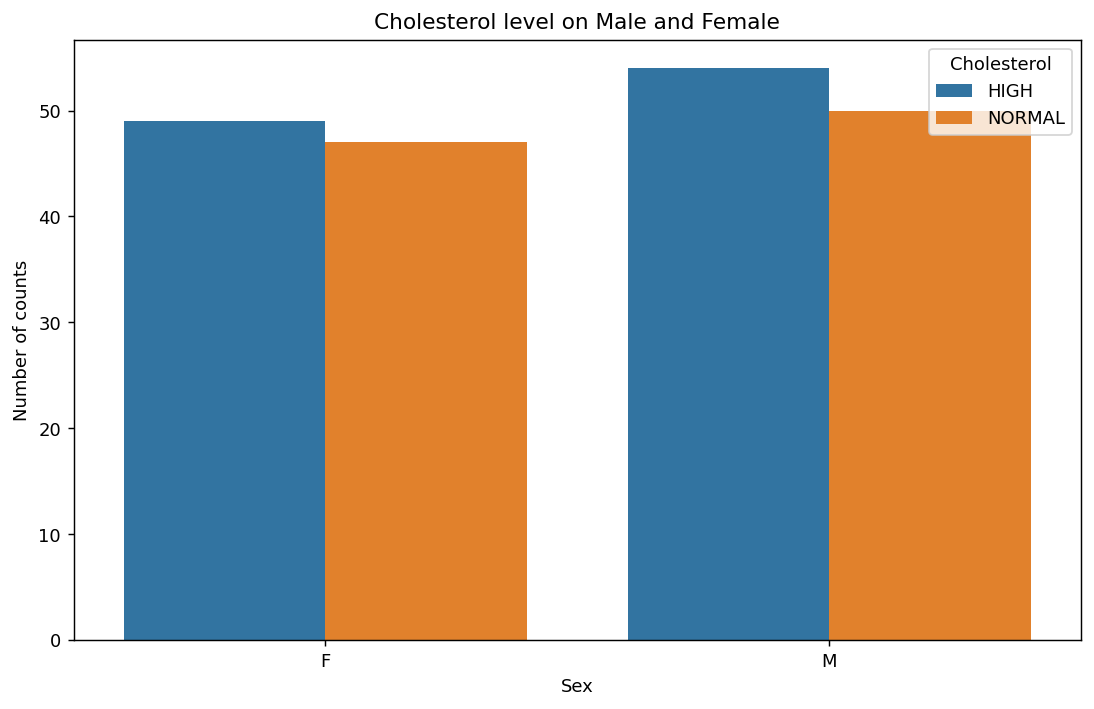

In [8]:
plt.figure(figsize = (10,6), dpi = 130)
sns.countplot(data = df, x = 'Sex', hue = 'Cholesterol')
plt.title('Cholesterol level on Male and Female')
plt.xlabel('Sex')
plt.ylabel('Number of counts')
plt.show()

In [9]:
df['BP'].value_counts()

BP
HIGH      77
LOW       64
NORMAL    59
Name: count, dtype: int64

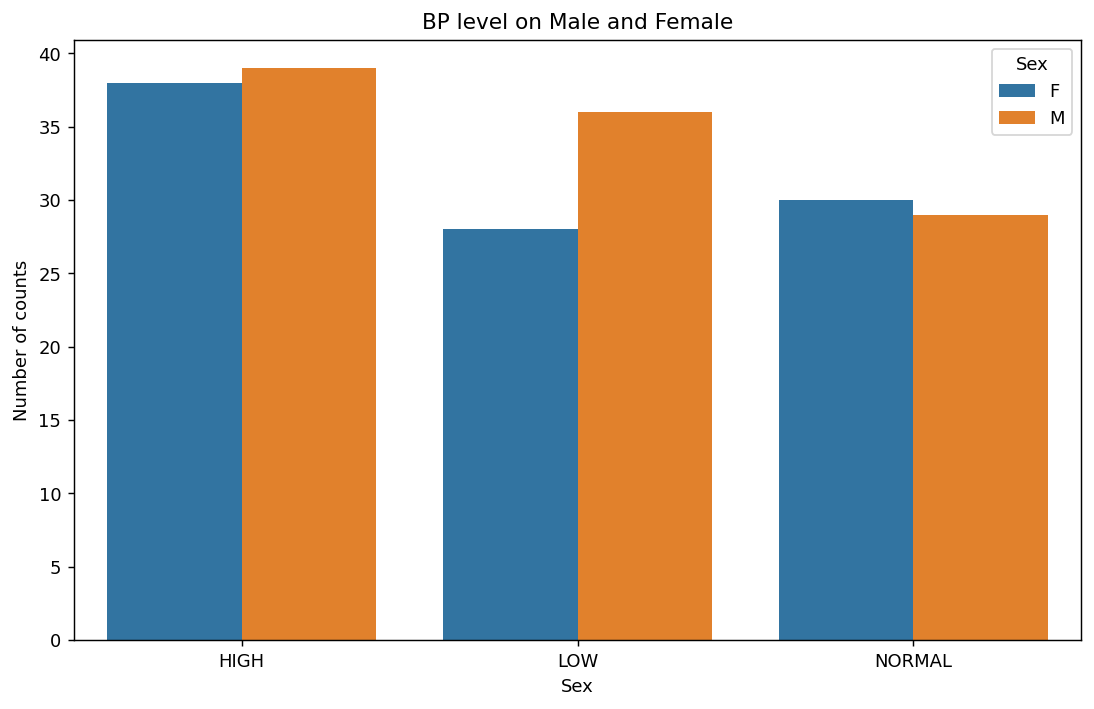

In [10]:
plt.figure(figsize = (10,6), dpi = 130)
sns.countplot(data = df, x = 'BP', hue = 'Sex')
plt.title('BP level on Male and Female')
plt.xlabel('Sex')
plt.ylabel('Number of counts')
plt.show()

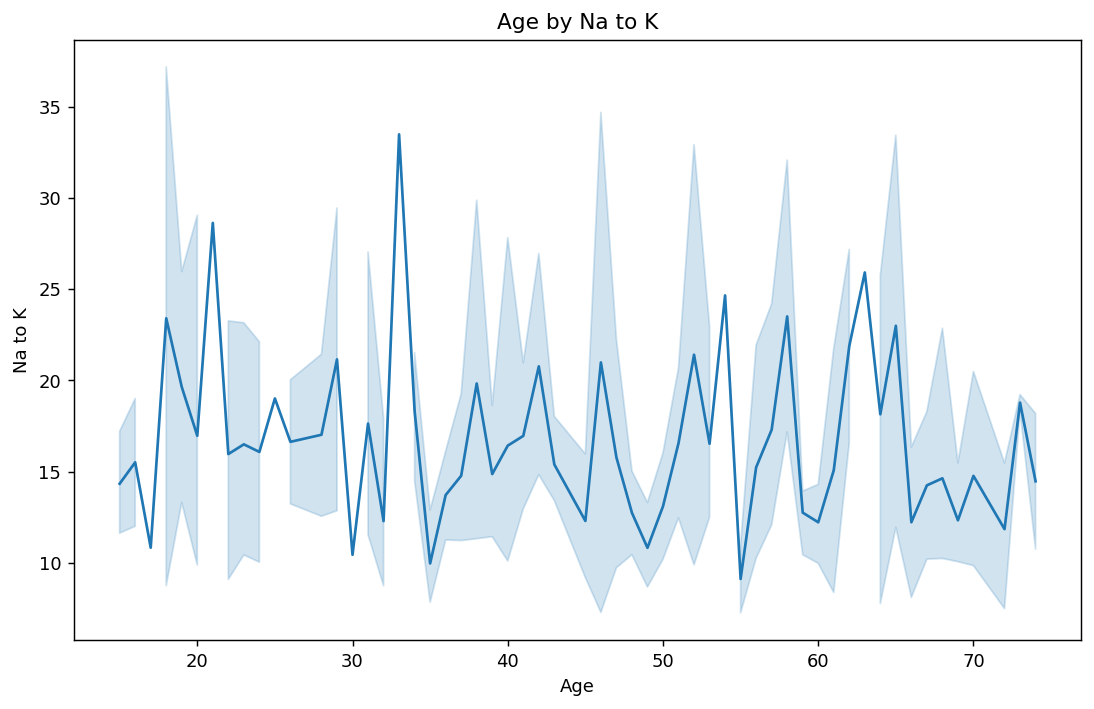

In [11]:
plt.figure(figsize = (10,6), dpi = 130)
sns.lineplot(data = df, x = 'Age',y = 'Na_to_K')
plt.title('Age by Na to K')
plt.xlabel('Age')
plt.ylabel('Na to K')
plt.show()

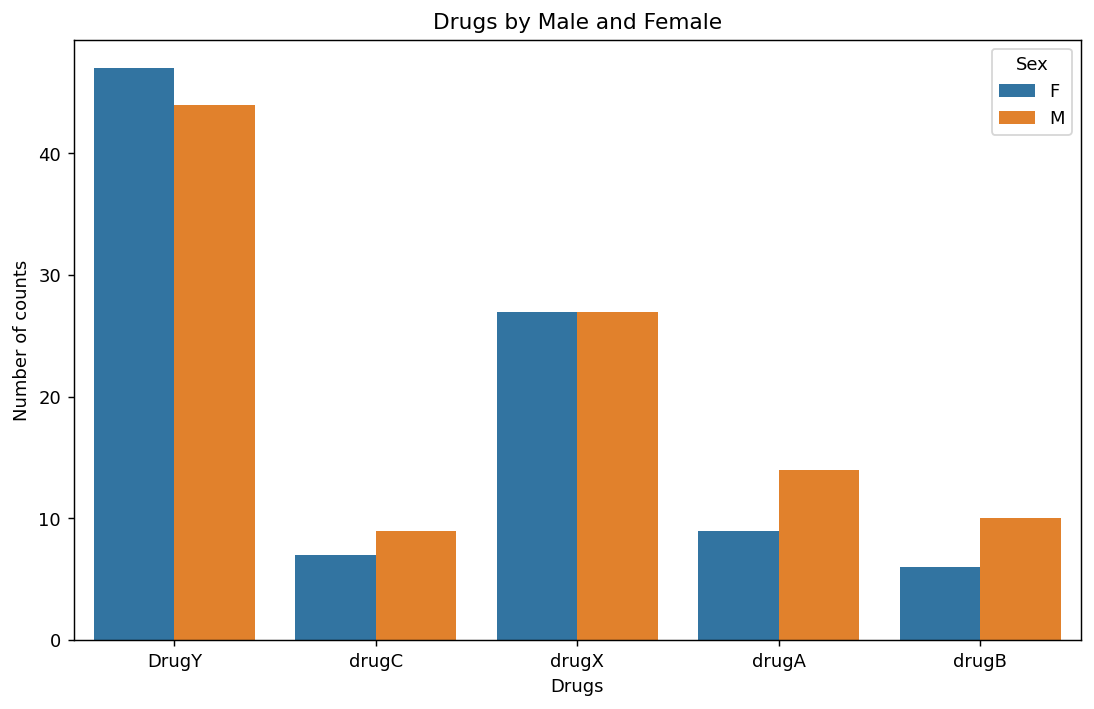

In [12]:
plt.figure(figsize = (10,6), dpi = 130)
sns.countplot(data = df, x = 'Drug', hue = 'Sex')
plt.title('Drugs by Male and Female')
plt.xlabel('Drugs')
plt.ylabel('Number of counts')
plt.show()

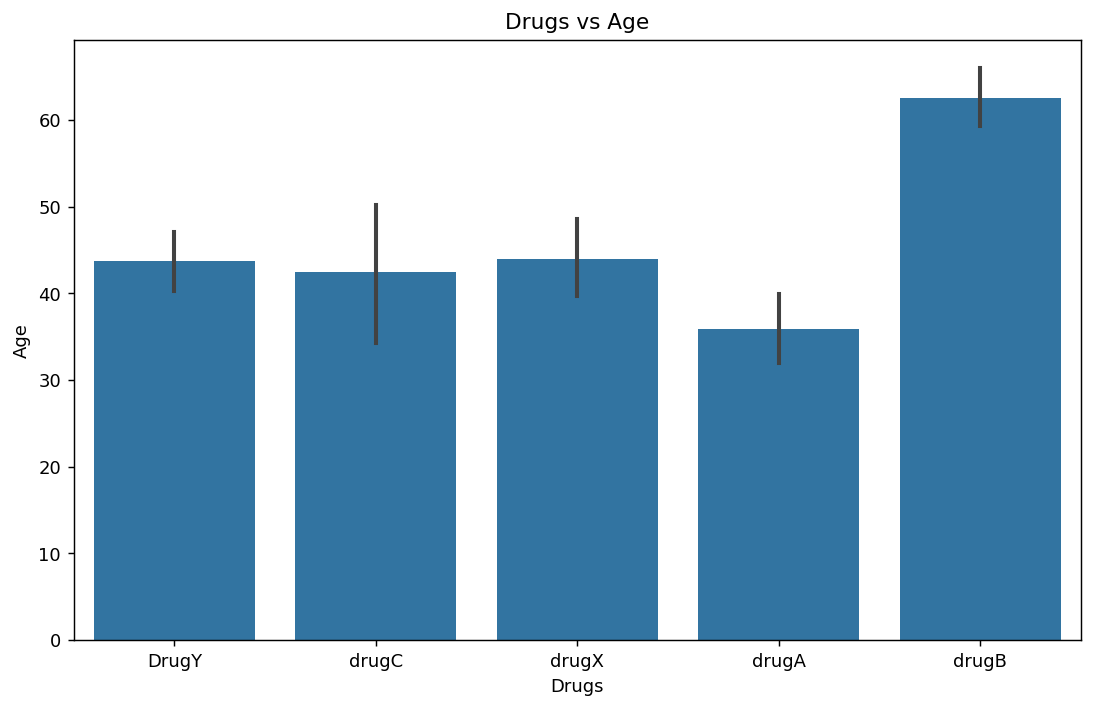

In [13]:
plt.figure(figsize = (10,6), dpi = 130)
sns.barplot(data = df, x = 'Drug', y = 'Age')
plt.title('Drugs vs Age')
plt.xlabel('Drugs')
plt.ylabel('Age')
plt.show()

In [14]:
df_cor = pd.get_dummies(df) #Convert categorical variable to numerical using one-hot encoding
df_corr = df_cor.corr()

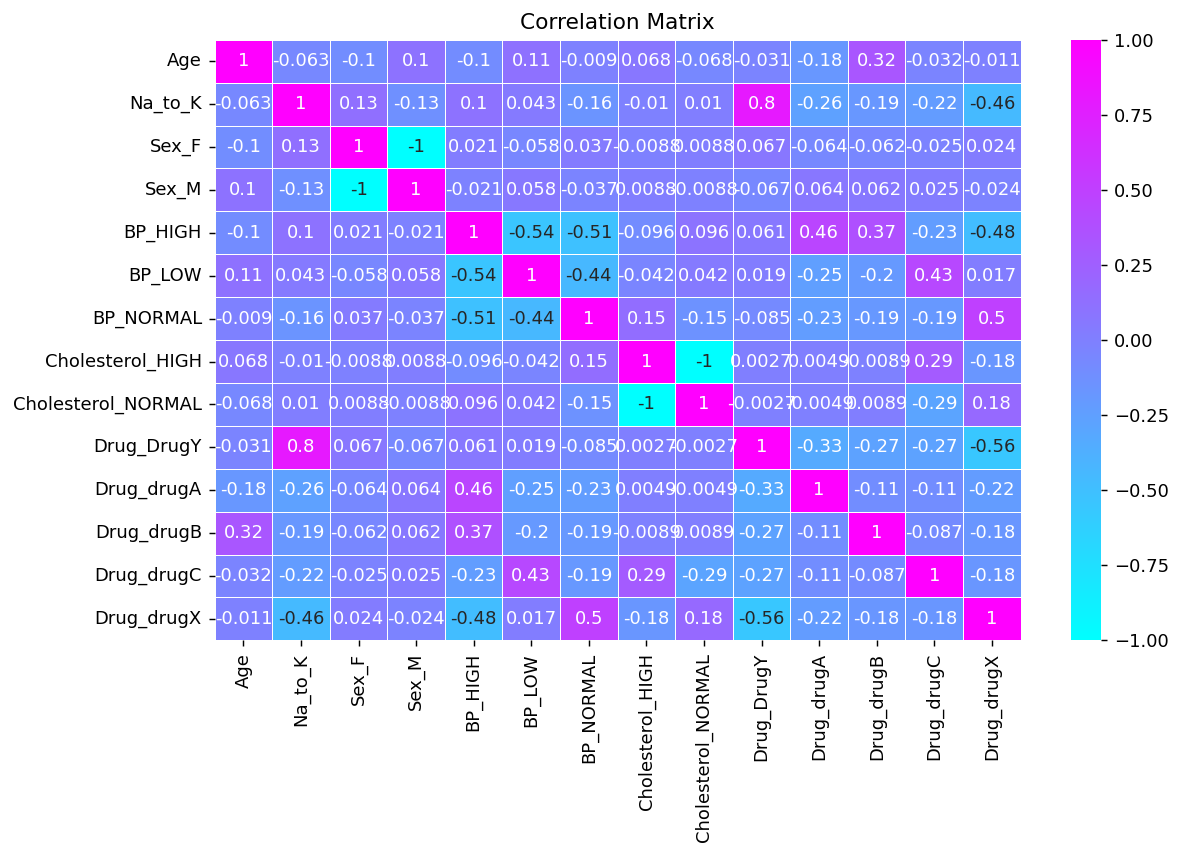

In [15]:
plt.figure(figsize = (10,6), dpi = 130)
sns.heatmap(df_corr, annot = True , cmap = 'cool', linewidths = 0.5)
plt.title('Correlation Matrix')
plt.show()

4. Set Feature and Target variable


In [16]:
X = df.iloc[:,:-1] #Feature
Y = df.iloc[:,-1:] #Target

5. Convert Categorical variable into integer

In [33]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

x = pd.get_dummies(X,columns=['Sex','BP','Cholesterol'],drop_first = True)
le = LabelEncoder()
y = le.fit_transform(Y)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


6. Spilting the data into training and testing

In [34]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

7. Feature Scaling

In [35]:
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.fit_transform(x_test)

In [37]:
Y_train = keras.utils.to_categorical(y_train)
Y_test = keras.utils.to_categorical(y_test)

8. Create a Model

In [60]:
Y_class = len(np.unique(y))
print(Y_class)

5


In [61]:
model = Sequential()
model.add(Dense(12, input_dim=6, activation='relu'))
model.add(Dense(24, activation='relu'))
model.add(Dense(36, activation='relu'))
output_layer = Dense(Y_class,activation='softmax')
model.add(output_layer)

In [62]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 12)                84        
                                                                 
 dense_5 (Dense)             (None, 24)                312       
                                                                 
 dense_6 (Dense)             (None, 36)                900       
                                                                 
 dense_7 (Dense)             (None, 5)                 185       
                                                                 
Total params: 1481 (5.79 KB)
Trainable params: 1481 (5.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


9. Compile the model

In [63]:
model.compile(loss = 'categorical_crossentropy',optimizer = 'adam',metrics = ['accuracy'] )

10. Train the model

In [64]:
model.fit(X_train,Y_train,epochs = 48,batch_size = 6)

Epoch 1/48
27/27 [==============================] - 1s 3ms/step - loss: 1.5837 - accuracy: 0.2625
Epoch 2/48
27/27 [==============================] - 0s 3ms/step - loss: 1.4115 - accuracy: 0.5063
Epoch 3/48
27/27 [==============================] - 0s 3ms/step - loss: 1.2431 - accuracy: 0.5437
Epoch 4/48
27/27 [==============================] - 0s 3ms/step - loss: 1.0673 - accuracy: 0.6062
Epoch 5/48
27/27 [==============================] - 0s 3ms/step - loss: 0.9136 - accuracy: 0.6938
Epoch 6/48
27/27 [==============================] - 0s 3ms/step - loss: 0.7796 - accuracy: 0.7312
Epoch 7/48
27/27 [==============================] - 0s 3ms/step - loss: 0.6795 - accuracy: 0.7625
Epoch 8/48
27/27 [==============================] - 0s 4ms/step - loss: 0.5942 - accuracy: 0.7750
Epoch 9/48
27/27 [==============================] - 0s 3ms/step - loss: 0.5295 - accuracy: 0.8500
Epoch 10/48
27/27 [==============================] - 0s 4ms/step - loss: 0.4777 - accuracy: 0.8562
Epoch 11/48
27/27 [

11. Test the Accuracy

In [65]:
loss,accuracy = model.evaluate(X_test,Y_test)
print(f'Accuracy is {accuracy*100}')

2/2 [==============================] - 0s 8ms/step - loss: 0.1684 - accuracy: 0.9250
Accuracy is 92.5000011920929


In [66]:
y_pred = model.predict(X_test)
y_pred

2/2 [==============================] - 0s 4ms/step


array([[1.24354789e-03, 2.15131131e-05, 4.99395537e-04, 5.74747883e-02,
        9.40760732e-01],
       [9.49741185e-01, 4.67118546e-02, 1.36156785e-04, 3.39459977e-03,
        1.63007207e-05],
       [9.13895235e-08, 5.88439786e-09, 5.23013910e-07, 6.60139108e-07,
        9.99998689e-01],
       [6.16780035e-02, 1.63531397e-02, 5.91093600e-01, 3.25742126e-01,
        5.13314456e-03],
       [1.00000000e+00, 2.78980994e-24, 5.98318276e-21, 4.31681261e-14,
        1.67206806e-22],
       [9.99999285e-01, 3.54053209e-09, 6.36104403e-07, 1.34712565e-07,
        6.54537798e-14],
       [9.99999881e-01, 2.57353555e-10, 4.59565025e-11, 9.82603723e-08,
        2.24053458e-12],
       [6.47014094e-05, 5.58950603e-07, 9.53347480e-05, 1.13786664e-05,
        9.99827981e-01],
       [3.13428082e-02, 5.22032082e-01, 4.22085583e-01, 2.45186314e-02,
        2.09398386e-05],
       [4.05497858e-09, 2.61664915e-16, 4.70500865e-08, 3.26441124e-10,
        1.00000000e+00],
       [2.89738382e-04, 9.9496

In [70]:
Y_test

array([[0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1.